<a href="https://colab.research.google.com/github/Sureshkumar0406/Customer_Churn_prediction_using_XGBoost/blob/main/Customer_Churn_Prediction_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Import the dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("waseemalastal/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/waseemalastal/telco-customer-churn-ibm-dataset/versions/1


In [21]:
# setup drive to save the dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Upload the dataset into Google Drive
import os

# Define dataset location in Google Drive
dataset_path = "/content/drive/MyDrive/dataset/"

# Create directory if it doesn't exist
os.makedirs(dataset_path, exist_ok=True)

# Download dataset
!kaggle datasets download -d waseemalastal/telco-customer-churn-ibm-dataset -p {dataset_path} --unzip

print("Dataset saved at:", dataset_path)


Dataset URL: https://www.kaggle.com/datasets/waseemalastal/telco-customer-churn-ibm-dataset
License(s): DbCL-1.0
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 139MB/s]
Dataset saved at: /content/drive/MyDrive/dataset/


In [4]:
#Load the dataset

import pandas as pd

# Load dataset (adjust filename if necessary)
df = pd.read_excel("/content/drive/MyDrive/dataset/Telco_customer_churn_IBM_dataset/Telco_customer_churn.xlsx")

# Display first few rows
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#Preprocessing the dataset using Explatory Data Analysis techniques


In [3]:

df['Count'].unique()

array([1])

In [4]:
df['Country'].unique()

array(['United States'], dtype=object)

In [5]:
df['State'].unique()

array(['California'], dtype=object)

In [6]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

In [7]:
#Finalize the list of features to avoid overfitting & noisy data during training

df.drop(['CustomerID','Count','Country','State','Lat Long','Churn Label','Churn Score','CLTV','Churn Reason'],axis =1, inplace = True)

In [7]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:

df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

<ipython-input-8-ef234f14b342>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(' ', '_', regex=True, inplace=True)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los_Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los_Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los_Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los_Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los_Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df['City'].unique()[1:10]

array(['Beverly_Hills', 'Huntington_Park', 'Lynwood', 'Marina_Del_Rey',
       'Inglewood', 'Santa_Monica', 'Torrance', 'Whittier', 'La_Habra'],
      dtype=object)

In [10]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [11]:
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip_Code,int64
Lat_Long,object
Latitude,float64
Longitude,float64
Gender,object


In [12]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [14]:
len(df.loc[df['Total_Charges']==' '])

11

In [15]:
df.loc[df['Total_Charges']==' ']

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
2234,4472-LVYGI,1,United States,California,San_Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San_Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los_Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun_City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben_Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La_Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,,No,0,44,2342,NaN


In [16]:
#Handling null values in the dataframe

df.loc[(df['Total_Charges']==' '),'Total_Charges']=0
df.loc[df['Tenure_Months']==0]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
2234,4472-LVYGI,1,United States,California,San_Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,0,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,0,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San_Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,0,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,0,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,0,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los_Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,0,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun_City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,0,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben_Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,0,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La_Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,0,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,0,No,0,44,2342,NaN


In [17]:
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip_Code,int64
Lat_Long,object
Latitude,float64
Longitude,float64
Gender,object


In [18]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip_Code,int64
Lat_Long,object
Latitude,float64
Longitude,float64
Gender,object


In [19]:
df.replace(' ','_',regex=True,inplace  = True)
df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United_States,California,Los_Angeles,90003,"33.964131,_-118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes,1,86,3239,Competitor_made_better_offer
1,9237-HQITU,1,United_States,California,Los_Angeles,90005,"34.059281,_-118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United_States,California,Los_Angeles,90006,"34.048013,_-118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic_check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United_States,California,Los_Angeles,90010,"34.062125,_-118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic_check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United_States,California,Los_Angeles,90015,"34.039224,_-118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,Yes,1,89,5340,Competitor_had_better_devices


In [20]:
#Create X & y dataset based on above preprocessing steps,

X= df.drop('Churn_Value',axis = 1).copy()
X.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United_States,California,Los_Angeles,90003,"33.964131,_-118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes,86,3239,Competitor_made_better_offer
1,9237-HQITU,1,United_States,California,Los_Angeles,90005,"34.059281,_-118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes,67,2701,Moved
2,9305-CDSKC,1,United_States,California,Los_Angeles,90006,"34.048013,_-118.293953",34.048013,-118.293953,Female,...,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,Yes,86,5372,Moved
3,7892-POOKP,1,United_States,California,Los_Angeles,90010,"34.062125,_-118.315709",34.062125,-118.315709,Female,...,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,Yes,84,5003,Moved
4,0280-XJGEX,1,United_States,California,Los_Angeles,90015,"34.039224,_-118.266293",34.039224,-118.266293,Male,...,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,Yes,89,5340,Competitor_had_better_devices


In [21]:
y=df['Churn_Value'].copy()
y.head()

,Churn_Value
0,1
1,1
2,1
3,1
4,1


In [22]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat_Long',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn_Label',
 'Churn_Reason']

In [24]:
df['City'].unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [25]:
df['Payment_Method'].unique()

array(['Mailed_check', 'Electronic_check', 'Bank_transfer_(automatic)',
       'Credit_card_(automatic)'], dtype=object)

In [23]:
#Apply one hot encoding using Column Transformer

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

In [24]:
X_encoded

array([[   0.  ,    0.  ,    0.  , ...,  108.15,   86.  , 3239.  ],
       [   0.  ,    0.  ,    0.  , ...,  151.65,   67.  , 2701.  ],
       [   0.  ,    0.  ,    0.  , ...,  820.5 ,   86.  , 5372.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ..., 7362.9 ,   71.  , 5560.  ],
       [   0.  ,    0.  ,    0.  , ...,  346.45,   59.  , 2793.  ],
       [   0.  ,    0.  ,    0.  , ..., 6844.5 ,   38.  , 5097.  ]])

In [26]:
# Convert back to DataFrame with new column names
new_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
final_columns = list(new_columns) + [col for col in X.columns if col not in categorical_features]
X_final = pd.DataFrame(X_encoded, columns=final_columns)

# Display the transformed DataFrame
print(X_final.head())

   CustomerID_0002-ORFBO  CustomerID_0003-MKNFE  CustomerID_0004-TLHLJ  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   CustomerID_0011-IGKFF  CustomerID_0013-EXCHZ  CustomerID_0013-MHZWF  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   CustomerID_0013-SMEOE  CustomerID_0014-BMAQU  CustomerID_0015-UOCOJ  \
0                    0.0            

In [27]:
print(X_final.columns.to_list())

['CustomerID_0002-ORFBO', 'CustomerID_0003-MKNFE', 'CustomerID_0004-TLHLJ', 'CustomerID_0011-IGKFF', 'CustomerID_0013-EXCHZ', 'CustomerID_0013-MHZWF', 'CustomerID_0013-SMEOE', 'CustomerID_0014-BMAQU', 'CustomerID_0015-UOCOJ', 'CustomerID_0016-QLJIS', 'CustomerID_0017-DINOC', 'CustomerID_0017-IUDMW', 'CustomerID_0018-NYROU', 'CustomerID_0019-EFAEP', 'CustomerID_0019-GFNTW', 'CustomerID_0020-INWCK', 'CustomerID_0020-JDNXP', 'CustomerID_0021-IKXGC', 'CustomerID_0022-TCJCI', 'CustomerID_0023-HGHWL', 'CustomerID_0023-UYUPN', 'CustomerID_0023-XUOPT', 'CustomerID_0027-KWYKW', 'CustomerID_0030-FNXPP', 'CustomerID_0031-PVLZI', 'CustomerID_0032-PGELS', 'CustomerID_0036-IHMOT', 'CustomerID_0040-HALCW', 'CustomerID_0042-JVWOJ', 'CustomerID_0042-RLHYP', 'CustomerID_0048-LUMLS', 'CustomerID_0048-PIHNL', 'CustomerID_0052-DCKON', 'CustomerID_0052-YNYOT', 'CustomerID_0056-EPFBG', 'CustomerID_0057-QBUQH', 'CustomerID_0058-EVZWM', 'CustomerID_0060-FUALY', 'CustomerID_0064-SUDOG', 'CustomerID_0064-YIJGF',

In [28]:
y.unique()

array([1, 0])

**Build Random Forest Classifier**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state = 42,stratify =y)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42,n_estimators = 100,criterion = 'gini',max_depth = 10,min_samples_split = 5,min_samples_leaf = 3)

# Train the model
rf_clf.fit(X_train, y_train)




RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred_prob = rf_clf.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9421
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1294
           1       1.00      0.78      0.88       467

    accuracy                           0.94      1761
   macro avg       0.96      0.89      0.92      1761
weighted avg       0.95      0.94      0.94      1761



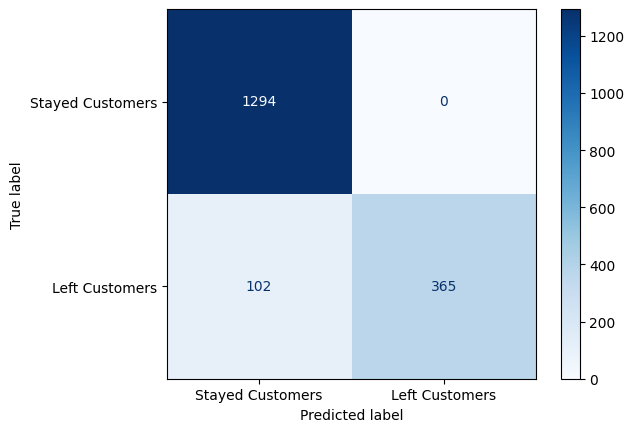

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ["Stayed Customers", "Left Customers"]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Build Preliminary XGBoost Model**


In [31]:
sum(y)/len(y)

0.2653698707936959

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state = 42,stratify =y)


In [33]:
sum(y_train)/len(y_train)

0.2654297614539947

In [34]:
sum(y_test)/len(y_test)

0.26519023282226006

In [35]:
import xgboost as xgb

# Convert dataset into DMatrix (Optimized format for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Logarithmic loss for evaluation
    'learning_rate': 0.1,            # Step size shrinkage
    'max_depth': 6,                  # Maximum depth of trees
    'subsample': 0.8,                # Fraction of data used for training
    'colsample_bytree': 0.8,         # Fraction of features used for training
    'random_state': 42
}

# Train model with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,  # Stop if eval metric doesn't improve for 10 rounds
    verbose_eval=True
)


[0]	train-logloss:0.64645	eval-logloss:0.64971
[1]	train-logloss:0.60738	eval-logloss:0.61413
[2]	train-logloss:0.57490	eval-logloss:0.58439
[3]	train-logloss:0.54678	eval-logloss:0.55941
[4]	train-logloss:0.52218	eval-logloss:0.53850
[5]	train-logloss:0.50150	eval-logloss:0.52055
[6]	train-logloss:0.48361	eval-logloss:0.50468
[7]	train-logloss:0.46775	eval-logloss:0.49055
[8]	train-logloss:0.45381	eval-logloss:0.47877
[9]	train-logloss:0.44143	eval-logloss:0.46881
[10]	train-logloss:0.43026	eval-logloss:0.46020
[11]	train-logloss:0.42016	eval-logloss:0.45201
[12]	train-logloss:0.41129	eval-logloss:0.44462
[13]	train-logloss:0.40305	eval-logloss:0.43916
[14]	train-logloss:0.39556	eval-logloss:0.43429
[15]	train-logloss:0.38893	eval-logloss:0.43028
[16]	train-logloss:0.38302	eval-logloss:0.42622
[17]	train-logloss:0.37774	eval-logloss:0.42325
[18]	train-logloss:0.37309	eval-logloss:0.42096
[19]	train-logloss:0.36818	eval-logloss:0.41849
[20]	train-logloss:0.36417	eval-logloss:0.41631
[2

In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred_prob = model.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8047
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.74      1761
weighted avg       0.80      0.80      0.80      1761



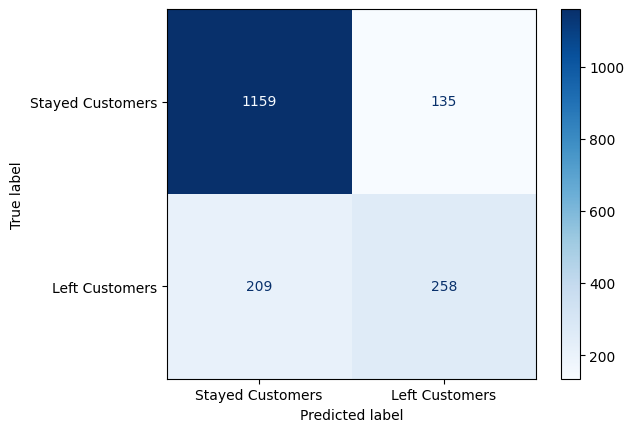

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ["Stayed Customers", "Left Customers"]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In the above confusion matrix, out of 1294 customers who stayed in the company, model correctly identifies (1159) i.e. 89% of the customers who didnt leave the company.

Also, w.r.t total number fo left customer i.e. 467( predicted as left customers), out of this, 258 i.e.55% is correctly identified as custoemrs  left company

#Optimize XGBoost hyperparameters for better model prediction & accuracy


In [38]:
!pip install scikit-learn==1.3.0 xgboost==1.7.6

In [39]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
clf_xgb = XGBClassifier(objective = 'binary:logistic',
              eval_metric = 'logloss',
              learning_rate = 0.1)

clf_xgb.fit(X_train,y_train,verbose = True,early_stopping_rounds = 10,eval_set = [(X_test,y_test)])

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64910
[1]	validation_0-logloss:0.61321
[2]	validation_0-logloss:0.58284
[3]	validation_0-logloss:0.55778
[4]	validation_0-logloss:0.53672
[5]	validation_0-logloss:0.51810
[6]	validation_0-logloss:0.50293
[7]	validation_0-logloss:0.48924
[8]	validation_0-logloss:0.47738
[9]	validation_0-logloss:0.46756
[10]	validation_0-logloss:0.45855
[11]	validation_0-logloss:0.45114
[12]	validation_0-logloss:0.44413
[13]	validation_0-logloss:0.43852
[14]	validation_0-logloss:0.43346
[15]	validation_0-logloss:0.42896
[16]	validation_0-logloss:0.42468
[17]	validation_0-logloss:0.42163
[18]	validation_0-logloss:0.41855
[19]	validation_0-logloss:0.41604
[20]	validation_0-logloss:0.41376
[21]	validation_0-logloss:0.41214
[22]	validation_0-logloss:0.41069
[23]	validation_0-logloss:0.40903
[24]	validation_0-logloss:0.40771
[25]	validation_0-logloss:0.40664
[26]	validation_0-logloss:0.40597
[27]	validation_0-logloss:0.40500
[28]	validation_0-logloss:0.40425
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

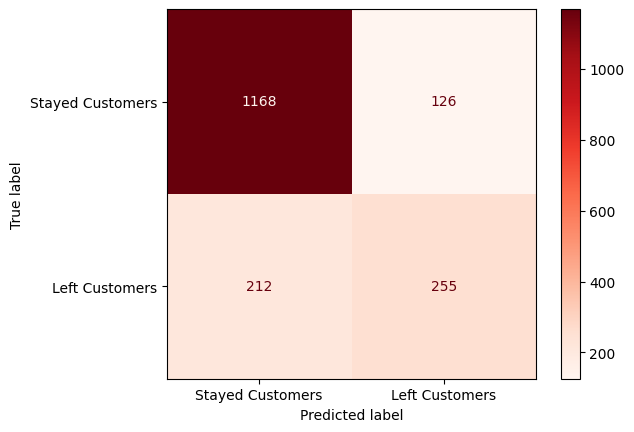

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained model
y_pred_xgb = clf_xgb.predict(X_test)  # Get predictions from your model

# Generate confusion matrix using true and predicted values
cm = confusion_matrix(y_test, y_pred_xgb)

labels = ["Stayed Customers", "Left Customers"]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [41]:
clf_xgb = XGBClassifier(objective = 'binary:logistic',
                        gamma = 0.25,
                        learning_rate = 0.01,
                        max_depth = 4,
                        reg_lambda = 3,
              eval_metric = 'logloss')

clf_xgb.fit(X_train,y_train,verbose = True,early_stopping_rounds = 10,eval_set = [(X_test,y_test)])



/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68874
[1]	validation_0-logloss:0.68442
[2]	validation_0-logloss:0.68019
[3]	validation_0-logloss:0.67603
[4]	validation_0-logloss:0.67199
[5]	validation_0-logloss:0.66797
[6]	validation_0-logloss:0.66410
[7]	validation_0-logloss:0.66026
[8]	validation_0-logloss:0.65650
[9]	validation_0-logloss:0.65283
[10]	validation_0-logloss:0.64919
[11]	validation_0-logloss:0.64564
[12]	validation_0-logloss:0.64217
[13]	validation_0-logloss:0.63872
[14]	validation_0-logloss:0.63535
[15]	validation_0-logloss:0.63202
[16]	validation_0-logloss:0.62879
[17]	validation_0-logloss:0.62560
[18]	validation_0-logloss:0.62246
[19]	validation_0-logloss:0.61939
[20]	validation_0-logloss:0.61635
[21]	validation_0-logloss:0.61338
[22]	validation_0-logloss:0.61048
[23]	validation_0-logloss:0.60759
[24]	validation_0-logloss:0.60480
[25]	validation_0-logloss:0.60199
[26]	validation_0-logloss:0.59929
[27]	validation_0-logloss:0.59659
[28]	validation_0-logloss:0.59394
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [42]:
#Ensure model is utlizing GPU instead of CPU for faster training & inferencing
xgb_clf = XGBClassifier(
    tree_method="gpu_hist",  # Ensures GPU usage
    gpu_id=0,  # Use the first available GPU
    predictor="gpu_predictor"
)

In [43]:
xgb_clf.fit(X_train, y_train)

# Check GPU utilization
!nvidia-smi


Fri Feb 14 10:58:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             44W /   70W |     128MiB /  15360MiB |     55%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [44]:
#Hyper parameter tuning to find the best fit for the model

param_grid = {
    'max_depth' :[3,4,],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.1,0.2],
    'reg_lambda':[0.1,0.5,10],
    'scale_pos_weight':[1,3,5],
    'subsample':[0.5],
    'colsample_bytree':[0.6]

}
xgb_clf = XGBClassifier(tree_method="gpu_hist", gpu_id=0)

optimal_params = GridSearchCV(
    estimator = xgb_clf,
    param_grid = param_grid,
    scoring = 'roc_auc',
    verbose = 0,
    # random_state = 42
    n_jobs =10,
    cv = 3

)
optimal_params.fit(X_train,y_train)

print(optimal_params.best_params_)
print(optimal_params.best_score_)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 0.5}
0.8668243166303


In [46]:
#Evaluating using the best aprameters from abovefine tuning

clf_xgb1 = XGBClassifier(objective = 'binary:logistic',
                        gamma = 0,
                        learning_rate = 0.05,
                        max_depth = 4,
                        reg_lambda = 10,
                         scale_pos_weight = 3,
                         subsample = 0.5,
                         colsample_bytree = 0.6,
              eval_metric = 'logloss')

clf_xgb1.fit(X_train,y_train,verbose = True,early_stopping_rounds = 10,eval_set = [(X_test,y_test)])


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67860
[1]	validation_0-logloss:0.66452
[2]	validation_0-logloss:0.65167
[3]	validation_0-logloss:0.64139
[4]	validation_0-logloss:0.63139
[5]	validation_0-logloss:0.62148
[6]	validation_0-logloss:0.61255
[7]	validation_0-logloss:0.60407
[8]	validation_0-logloss:0.59558
[9]	validation_0-logloss:0.58919
[10]	validation_0-logloss:0.58166
[11]	validation_0-logloss:0.57650
[12]	validation_0-logloss:0.57074
[13]	validation_0-logloss:0.56511
[14]	validation_0-logloss:0.56074
[15]	validation_0-logloss:0.55573
[16]	validation_0-logloss:0.55067
[17]	validation_0-logloss:0.54614
[18]	validation_0-logloss:0.54234
[19]	validation_0-logloss:0.53894
[20]	validation_0-logloss:0.53582
[21]	validation_0-logloss:0.53257
[22]	validation_0-logloss:0.53012
[23]	validation_0-logloss:0.52646
[24]	validation_0-logloss:0.52443
[25]	validation_0-logloss:0.52192
[26]	validation_0-logloss:0.51891
[27]	validation_0-logloss:0.51642
[28]	validation_0-logloss:0.51392
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

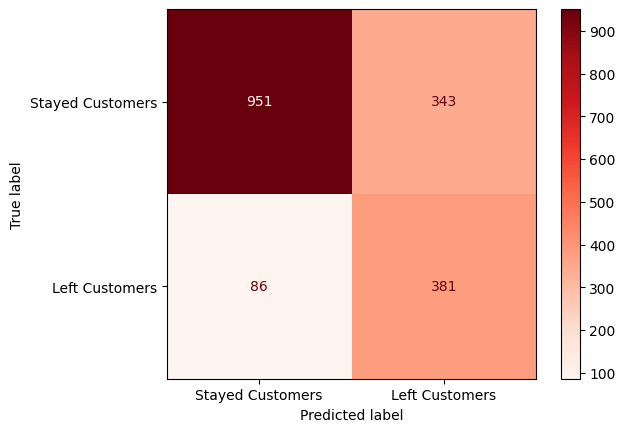

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained model
y_pred_xgb = clf_xgb1.predict(X_test)  # Get predictions from your model

# Generate confusion matrix using true and predicted values
cm = confusion_matrix(y_test, y_pred_xgb)

labels = ["Stayed Customers", "Left Customers"]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

After fine tune the hyperparameters, the models performance was incredibly increased in finding the True Negative cases compared to the earlier confusion matrix where model was trained with default values.
In the above confusion matrix, out of 1294 customers who stayed in the company, model correctly identifies (1294) i.e. 73% of the customers who didnt leave the company.

Also, w.r.t total number fo left customer i.e. 467( predicted as left customers), out of this, 381 i.e. 82% is correctly identified as custoemrs  left company

In [50]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = clf_xgb1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7564
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1294
           1       0.53      0.82      0.64       467

    accuracy                           0.76      1761
   macro avg       0.72      0.78      0.73      1761
weighted avg       0.81      0.76      0.77      1761



In [51]:
clf_xgb1 = XGBClassifier(objective = 'binary:logistic',
                        gamma = 0,
                        learning_rate = 0.05,
                        max_depth = 4,
                        reg_lambda = 10,
                         scale_pos_weight = 3,
                         subsample = 0.5,
                         colsample_bytree = 0.6,
                         n_estimators = 1)

clf_xgb1.fit(X_train,y_train,verbose = True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

weight:  {'Dependents_No': 2.0, 'Internet_Service_DSL': 1.0, 'Online_Security_No': 1.0, 'Tech_Support_No': 2.0, 'Paperless_Billing_No': 1.0, 'Zip_Code': 2.0, 'Tenure_Months': 3.0, 'Monthly_Charges': 2.0, 'Total_Charges': 1.0}
gain:  {'Dependents_No': 77.12007141113281, 'Internet_Service_DSL': 51.82671356201172, 'Online_Security_No': 630.5510864257812, 'Tech_Support_No': 24.402923583984375, 'Paperless_Billing_No': 15.704994201660156, 'Zip_Code': 9.877091407775879, 'Tenure_Months': 104.3045654296875, 'Monthly_Charges': 24.843856811523438, 'Total_Charges': 7.710077285766602}
cover:  {'Dependents_No': 307.125, 'Internet_Service_DSL': 233.0, 'Online_Security_No': 1018.5, 'Tech_Support_No': 174.75, 'Paperless_Billing_No': 100.75, 'Zip_Code': 31.375, 'Tenure_Months': 367.9166564941406, 'Monthly_Charges': 268.375, 'Total_Charges': 54.75}
total_gain:  {'Dependents_No': 154.24014282226562, 'Internet_Service_DSL': 51.82671356201172, 'Online_Security_No': 630.5510864257812, 'Tech_Support_No': 48.8

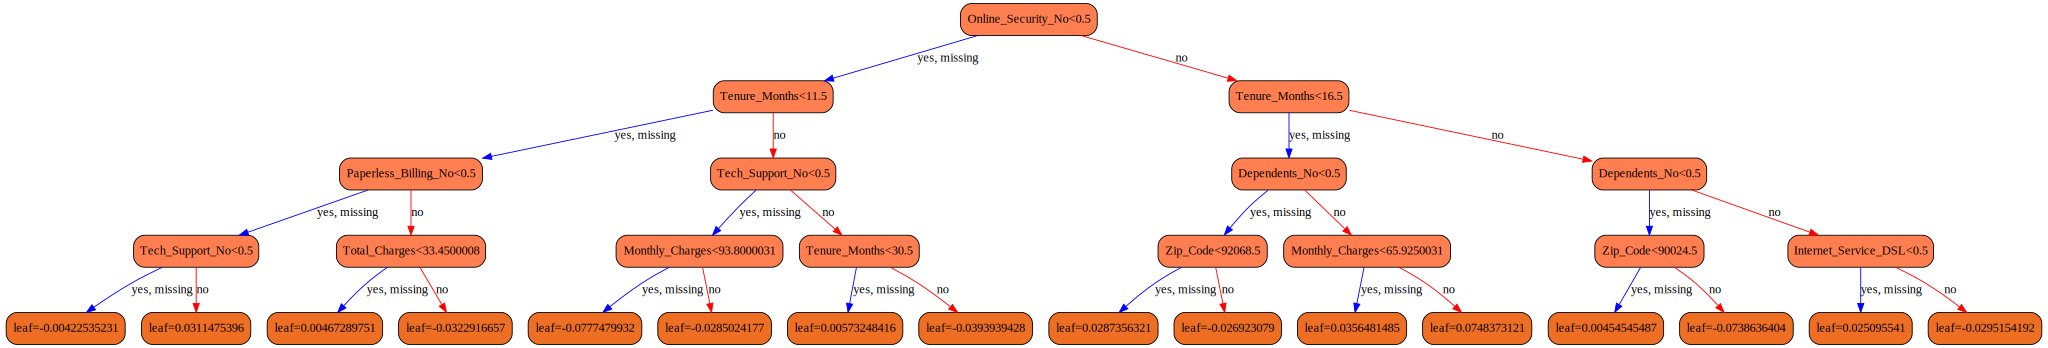

In [60]:
import xgboost as xgb
import graphviz
from xgboost import plot_tree, to_graphviz
import matplotlib.pyplot as plt

# Ensure your XGBoost model is trained
bst = clf_xgb1.get_booster()

# Display feature importance scores
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

# Define node and leaf parameters for styling
node_params = {'shape': 'box', 'style': 'filled,rounded', 'fillcolor': '#FF7F50'}
leaf_params = {'shape': 'box', 'style': 'filled,rounded', 'fillcolor': '#EE6F23'}

# Display the first tree from the model
dot = to_graphviz(clf_xgb1, num_trees=0, size="10,10",
                  condition_node_params=node_params,
                  leaf_node_params=leaf_params)

# Render the tree
dot.render("xgboost_tree", format="png", cleanup=False)  # Saves as 'xgboost_tree.png'

# Show in Jupyter Notebook or Google Colab
from IPython.display import display
display(dot)
